In [2]:
%pylab inline

import os
import pandas as pd

Populating the interactive namespace from numpy and matplotlib


In [4]:
list(sorted(os.listdir('data/competition_data/')))

['bill_of_materials.csv',
 'comp_adaptor.csv',
 'comp_boss.csv',
 'comp_elbow.csv',
 'comp_float.csv',
 'comp_hfl.csv',
 'comp_nut.csv',
 'comp_other.csv',
 'comp_sleeve.csv',
 'comp_straight.csv',
 'comp_tee.csv',
 'comp_threaded.csv',
 'components.csv',
 'specs.csv',
 'test_set.csv',
 'train_set.csv',
 'tube.csv',
 'tube_end_form.csv',
 'type_component.csv',
 'type_connection.csv',
 'type_end_form.csv']

In [28]:
train_set = pd.read_csv('data/competition_data/train_set.csv')
train_set['quote_date'] = pd.to_datetime(train_set['quote_date'])
train_set[:5]

,tube_assembly_id,supplier,quote_date,annual_usage,min_order_quantity,bracket_pricing,quantity,cost
0,TA-00002,S-0066,2013-07-07,0,0,Yes,1,21.905933
1,TA-00002,S-0066,2013-07-07,0,0,Yes,2,12.341214
2,TA-00002,S-0066,2013-07-07,0,0,Yes,5,6.601826
3,TA-00002,S-0066,2013-07-07,0,0,Yes,10,4.687770
4,TA-00002,S-0066,2013-07-07,0,0,Yes,25,3.541561


In [25]:
series = train_set['supplier'].value_counts()
df = pd.concat({'count': series}, axis=1)
df['index'] = range(len(df))
df['cum_sum'] = df['count'].cumsum()
df['cum_frac'] = df['cum_sum'] / df['count'].sum()
df

,count,index,cum_sum,cum_frac
S-0066,20553,0,20553,0.680270
S-0041,3323,1,23876,0.790256
S-0072,2317,2,26193,0.866945
S-0054,838,3,27031,0.894681
S-0026,727,4,27758,0.918744
S-0013,554,5,28312,0.937080
S-0058,516,6,28828,0.954159
S-0064,446,7,29274,0.968921
S-0062,264,8,29538,0.977659
S-0014,139,9,29677,0.982259


In [55]:
train_set['quote_date'].quantile([0.005, 0.01, 0.05, 0.5, 0.95, 0.99, 0.995])

0.005   1997-10-20
0.010   2000-04-04
0.050   2007-03-14
0.500   2013-07-01
0.950   2014-02-01
0.990   2014-07-22
0.995   2014-08-01
dtype: datetime64[ns]

In [59]:
train_set['annual_usage'].describe(percentiles=[0.01, 0.1, 0.25, 0.5, 0.75, 0.9, 0.99])

count     30213.000000
mean        120.369377
std        1590.331872
min           0.000000
1%            0.000000
10%           0.000000
25%           0.000000
50%           0.000000
75%           2.000000
90%          75.000000
99%        1800.000000
max      150000.000000
Name: annual_usage, dtype: float64

(0, 100)

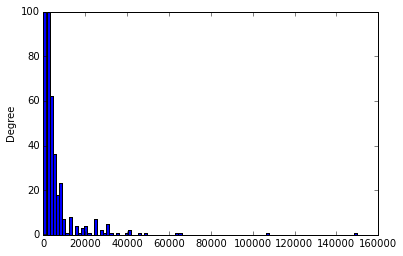

In [73]:
train_set['annual_usage'].plot(kind='hist', bins=100)
plt.ylim(0, 100)
#plt.xscale('log')

In [75]:
train_set['min_order_quantity'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    30213.000000
mean         2.084699
std         12.742776
min          0.000000
1%           0.000000
5%           0.000000
10%          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
90%          1.000000
95%          8.000000
99%         50.000000
max        535.000000
Name: min_order_quantity, dtype: float64

(0, 500)

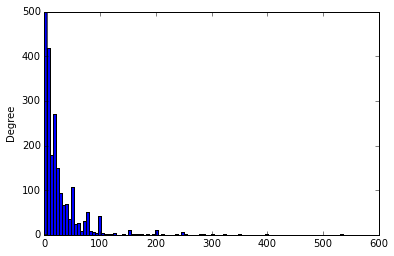

In [78]:
train_set['min_order_quantity'].plot(kind='hist', bins=100)
plt.ylim(0, 500)

In [81]:
train_set['bracket_pricing'].value_counts(normalize=True)

Yes    0.869924
No     0.130076
dtype: float64

In [84]:
train_set['quantity'].describe(percentiles=[0.01, 0.05, 0.1, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99])

count    30213.000000
mean        38.389369
std         70.761392
min          1.000000
1%           1.000000
5%           1.000000
10%          1.000000
25%          2.000000
50%         10.000000
75%         40.000000
90%        100.000000
95%        250.000000
99%        250.000000
max       2500.000000
Name: quantity, dtype: float64

(0, 10000)

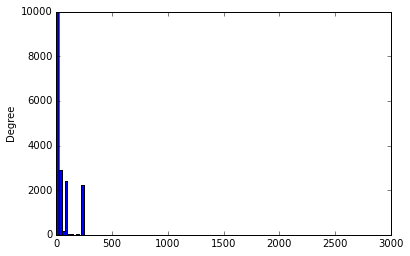

In [89]:
train_set['quantity'].plot(kind='hist', bins=100)
plt.ylim(0, 10000)
# train_set['quantity'].value_counts()

In [9]:
tube = pd.read_csv('data/competition_data/tube.csv')
tube[:5]

,tube_assembly_id,material_id,diameter,wall,length,num_bends,bend_radius,end_a_1x,end_a_2x,end_x_1x,end_x_2x,end_a,end_x,num_boss,num_bracket,other
0,TA-00001,SP-0035,12.70,1.65,164,5,38.10,N,N,N,N,EF-003,EF-003,0,0,0
1,TA-00002,SP-0019,6.35,0.71,137,8,19.05,N,N,N,N,EF-008,EF-008,0,0,0
2,TA-00003,SP-0019,6.35,0.71,127,7,19.05,N,N,N,N,EF-008,EF-008,0,0,0
3,TA-00004,SP-0019,6.35,0.71,137,9,19.05,N,N,N,N,EF-008,EF-008,0,0,0
4,TA-00005,SP-0029,19.05,1.24,109,4,50.80,N,N,N,N,EF-003,EF-003,0,0,0
